# 파이썬으로 하는 데이터 시각화 - 워드클라우드 

### 1. 데이터 시각화 = (데이터 처리 후) 시각화
### 2. 데이터 형식 : txt, csv, json 등등
### 3. 데이터 처리 : 시각화를 할 수 있는 형식으로 만들기 위해 데이터를 손질해줘야 한다 - 데이터 분석 및 시각화 작업의 80% 이상
* ex) 워드 클라우드를 만들기 위한 데이터 처리 : "이디야는 좋은 원두를 사용하기 때문에 아메리카노와 라떼가 맛있다" => ['이디야', '원두', '아메리카노', '라떼']

### 4. 사용할 라이브러리
* 데이터 처리를 위한 라이브러리 : numpy, KoNLpy
* 데이터 시각화를 위한 라이브러리 : matplotlib, wordcloud

#### 파일 열기 -  https://www.w3schools.com/python/python_file_open.asp

In [2]:
speech = []
with open('moon_speech.txt', 'r', encoding='utf-8') as t:
#     print(t)
    speech = t.read().splitlines()
    
# print(speech[0])
#     print(type(t.read()))

In [3]:
speech = [line for line in speech if line != '' and line != ' ']
print(speech)

['존경하는 국민 여러분,', '작년 이맘때, 진천 선수촌을 찾아 평창 동계올림픽의 성공을 기원 했습니다. 평창 동계올림픽의 개막식부터 폐막식까지 정부를 가슴 졸이게 한 것은 강원도의 매서운 추위였습니다. 그러나 그 추위 덕분에 전세계와 남·북이 함께 어울렸고 평화올림픽을 성공시킬 수 있었 습니다.', '“겨울은 추워야 제 맛”이라고 합니다. 제대로 겨울이 추워야 병충해를 막고, 보리농사가 풍년을 이룹니다. 인류학자들은 빙하기에 인간성이 싹텄다고 합니다. 온기를 나누며 서로가 더 절실해졌습니다.', '지난 한 해, 국민들의 힘으로 많은 변화를 이뤘고 새해를 맞이했습니다. 국민 여러분께 깊이 감사드리며 다시 한 번 새해 인사를 드립니다.', '국민 여러분,', '지난 해 우리는 사상 최초로 수출 6천억 불을 달성했습니다. 국민소득 3만불 시대를 열었습니다. 세계 6위 수출국이 되었고, 세계에서 일곱 번째로 경제강국 ‘30-50클럽’에 가입했습니다. 경제성장률도 경제발전 국가 중 가장 높은 수준을 유지하고 있습니다. 적어도 국가 경제에서 우리는 식민지와 전쟁, 가난과 독재를 극복하고 굉장한 발전을 이루었습니다.', '그러나 세계가 기적처럼 여기는 놀라운 국가 경제의 성장에도 불구하고, 삶이 고단한 국민들이 여전히 많습니다. 우리가 함께 이룬 경제 성장의 혜택이 소수의 상위계층과 대기업에 집중되었고, 모든 국민에게 고루 돌아가지 않았기 때문입니다. 장기간에 걸쳐, GDP 대비 기업소득의 비중은 경제성장률보다 계속해서 높아졌지만, 가계소득의 비중은 계속해서 낮아졌습니다. 이미 오래 전에 낙수 효과는 끝났습니다.', '수출의 증가가 고용의 증가로 이어지지 않은 지도 오래됐습니다. 어느덧 우리는 부의 양극화와 경제적 불평등이 세계에서 가장 극심한 나라가 됐습니다. 1대 99 사회 또는 승자독식 경제라고 불리는 경제적 불평등은 비단 우리만의 문제는 아닙니다. 전세계가 직면한 공통의 과제입니다. 그리고 세계는 드디어 그 문제를 해결하지 않고서는 성장의 지속이 불가능하다는 사

### KoNLPy를 이용한 한글 형태소 분석

http://konlpy.org/

#### KoNLPy 패키지에 있는 komoran 형태소 분석기 사용
https://github.com/shineware/KOMORAN
* POS = Part Of Speech
* 품사표 : https://docs.komoran.kr/firststep/postypes.html

In [2]:
from konlpy.tag import Komoran
tagger = Komoran()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [6]:
# speech[1]

# tags = tagger.pos(speech[1])
# print(tags)

tagged_speech = [tagger.pos(line) for line in speech]

# import pprint
# pprint.pprint(tagged_speech)

# for line in speech
# tagged_speech = [tagger.pos(line) for line in speech]



In [17]:
# 연설문의 명사 추출하기
speech_nouns = []

for sentence in tagged_speech:
    for word, tag in sentence:
        if tag in ['NNP', 'NNG']: # tag == 'NNP' or tag == 'NNG'
            speech_nouns.append(word)

pprint.pprint(speech_nouns)

['존경',
 '국민',
 '여러분',
 '작년',
 '이맘때',
 '진천',
 '선수촌',
 '평창',
 '동계',
 '올림픽',
 '성공',
 '기원',
 '평창',
 '동계',
 '올림픽',
 '개막식',
 '폐막식',
 '정부',
 '가슴',
 '강원도',
 '추위',
 '추위',
 '덕분',
 '세계',
 '남',
 '북',
 '평화',
 '올림픽',
 '성공',
 '겨울',
 '맛',
 '겨울',
 '병충해',
 '보리농사',
 '풍년',
 '인류학자',
 '빙하기',
 '인간성',
 '온기',
 '서로',
 '국민',
 '힘',
 '변화',
 '새해',
 '국민',
 '감사',
 '새해',
 '인사',
 '국민',
 '여러분',
 '사상',
 '최초',
 '수출',
 '불',
 '달성',
 '국민',
 '소득',
 '불',
 '시대',
 '세계',
 '수출국',
 '세계',
 '경제',
 '강국',
 '클럽',
 '가입',
 '경제성장',
 '경제',
 '발전',
 '국가',
 '수준',
 '유지',
 '국가',
 '경제',
 '식민지',
 '전쟁',
 '가난',
 '독재',
 '극복',
 '발전',
 '세계',
 '기적처럼',
 '국가',
 '경제',
 '성장',
 '삶',
 '국민',
 '경제',
 '성장',
 '혜택',
 '소수',
 '상위',
 '계층',
 '대기업',
 '집중',
 '국민',
 '장기간',
 '대비',
 '기업',
 '소득',
 '비중',
 '경제성장',
 '계속',
 '가계',
 '소득',
 '비중',
 '계속',
 '전',
 '낙수 효과',
 '수출',
 '증가',
 '고용',
 '증가',
 '지도',
 '부',
 '양극',
 '경제적 불평등',
 '세계',
 '나라',
 '사회',
 '승자',
 '독식',
 '경제',
 '경제적 불평등',
 '문제',
 '전',
 '세계',
 '직면',
 '공통',
 '과제',
 '세계',
 '문제',
 '해결',
 '성장',
 '지속',
 '사실',
 '인식',
 '국제기구',
 '

 '목표',
 '지점',
 '기초',
 '생활',
 '국민',
 '기본',
 '생활',
 '보장',
 '시작',
 '오늘',
 '발표',
 '포용',
 '국가',
 '추진',
 '계획',
 '일',
 '노후',
 '국민',
 '생애',
 '뒷받침',
 '목표',
 '건강',
 '안전',
 '소득',
 '환경',
 '주거',
 '삶',
 '영역',
 '대상',
 '국민',
 '생애',
 '기본',
 '생활',
 '영위',
 '나라',
 '포용',
 '국가',
 '대한민국',
 '청사진',
 '최저임금',
 '인상',
 '건강보험',
 '보장',
 '강화',
 '치매',
 '국가책임',
 '기초',
 '연금',
 '인상',
 '아동',
 '수당',
 '도입',
 '정책',
 '국민',
 '변화',
 '시작',
 '오늘',
 '발표',
 '계획',
 '차질',
 '추진',
 '유아',
 '어르신',
 '노동자',
 '자영업',
 '소상',
 '공인',
 '장애',
 '불편',
 '국민',
 '남녀노소',
 '기본',
 '생활',
 '포용',
 '국가',
 '사회',
 '정책',
 '목표',
 '국민',
 '삶',
 '말씀',
 '국민',
 '기본',
 '생활',
 '사회',
 '안전망',
 '사회',
 '서비스',
 '제공',
 '사회',
 '서비스',
 '분야',
 '일자리',
 '일자리',
 '질도',
 '결과',
 '국민',
 '안전',
 '삶의 질',
 '돌',
 '봄',
 '경제',
 '순환',
 '대한민국',
 '포용',
 '국가',
 '사회',
 '정책',
 '모두',
 '발언',
 '길',
 '길',
 '100년',
 '문재인',
 '대통령',
 '연설',
 '문선',
 '집',
 '사람',
 '투자',
 '기술',
 '발전',
 '산업',
 '발달',
 '원천',
 '사람',
 '돈',
 '걱정',
 '공부',
 '실패',
 '두려움',
 '꿈',
 '노후',
 '안락',
 '삶',
 '토대',
 '위',
 '도전',
 '혁신',
 '경제',
 '혁

 '국민',
 '민주',
 '역량',
 '전',
 '세계인',
 '감탄',
 '경제',
 '발전',
 '민주화',
 '성공',
 '나라',
 '대한민국',
 '세계',
 '이름',
 '나라',
 '성장',
 '발전',
 '경험',
 '자부심',
 '만',
 '토대',
 '위',
 '도전',
 '미래',
 '일부',
 '역사',
 '역사',
 '국민',
 '100년',
 '성취',
 '경향',
 '대한민국의 국가',
 '성취',
 '폄',
 '훼',
 '자부심',
 '역사',
 '성과',
 '바탕',
 '긍정',
 '사고',
 '때',
 '미래',
 '정부',
 '임시',
 '정부',
 '이상',
 '염원',
 '시작',
 '정부',
 '의미',
 '다짐',
 '대한민국',
 '이름',
 '국가',
 '성취',
 '국민',
 '삶',
 '완성',
 '국민',
 '피와',
 '땀',
 '국가',
 '성취',
 '과실',
 '국민',
 '모두',
 '국민',
 '주인',
 '국민',
 '성장',
 '시대',
 '이상',
 '국민',
 '희생',
 '강요',
 '사회',
 '경제적 불평등',
 '양극',
 '그늘',
 '국민',
 '사회',
 '혁신',
 '성장',
 '포용',
 '혁신',
 '포용',
 '국가',
 '100년',
 '기틀',
 '이유',
 '국민',
 '모두',
 '공정',
 '기회',
 '보장',
 '특권',
 '결탁',
 '담합',
 '공생',
 '국민',
 '삶',
 '좌절',
 '상처',
 '특권',
 '반칙',
 '시대',
 '정의',
 '공정',
 '사회',
 '100년',
 '토대',
 '앞',
 '과거',
 '질',
 '역사',
 '변방',
 '중심',
 '서서',
 '평화',
 '번영',
 '시대',
 '나가야',
 '한반도',
 '시대',
 '한반도',
 '평화',
 '프로세스',
 '진전',
 '전력',
 '내일',
 '미',
 '정상회담',
 '미국',
 '방문',
 '북미',
 '대화',
 '재개',
 '성과',
 '최선',


 '나라',
 '성장',
 '나라',
 '사다리',
 '지금',
 '일본',
 '대화',
 '협력',
 '길',
 '손',
 '공정',
 '교역',
 '협력',
 '동아시아',
 '지난해',
 '평창',
 '동계',
 '올림픽',
 '내년',
 '도쿄',
 '하계',
 '올림픽',
 '베이징',
 '동계',
 '올림픽',
 '올림픽',
 '사상',
 '최초',
 '동아시아',
 '릴레이',
 '올림픽',
 '동아시아',
 '우호',
 '협력',
 '기틀',
 '공동',
 '번영',
 '길',
 '절호',
 '기회',
 '세계인',
 '평창',
 '평화',
 '한반도',
 '도쿄 올림픽',
 '우호',
 '협력',
 '희망',
 '동아시아',
 '미래',
 '세대',
 '협력',
 '번영',
 '경험',
 '책임',
 '존경',
 '국민',
 '여러분',
 '오늘',
 '과거',
 '오늘',
 '대한민국',
 '도전',
 '시련',
 '극복',
 '성숙',
 '해진',
 '대한민국',
 '오늘',
 '아무도',
 '나라',
 '한반도',
 '목표',
 '제시',
 '책임',
 '경제',
 '강국',
 '자유',
 '무역',
 '질서',
 '동아시아',
 '평등',
 '협력',
 '국민',
 '기적처럼',
 '경제',
 '발전',
 '성과',
 '저력',
 '경제',
 '주권',
 '때',
 '운명',
 '주인',
 '통합',
 '국민의 힘',
 '위기',
 '기회',
 '도전',
 '중동',
 '열사',
 '태평양',
 '파도',
 '경제',
 '성장',
 '경공업',
 '중화학',
 '공업',
 '정보통신',
 '산업',
 '차례',
 '육성',
 '세계',
 '강국',
 '이제',
 '세계',
 '기술',
 '표준',
 '선도',
 '국가',
 '지금',
 '선진국',
 '추격',
 '이제',
 '도전',
 '선도',
 '경제',
 '일본',
 '수출',
 '규제',
 '책임',
 '경제',
 '강국',
 '길',
 '경제',
 '구조',
 '포용',
 '상

 '확장',
 '11월',
 '한국',
 '부산',
 '한-아세안 특별정상회의',
 '한',
 '메',
 '콩',
 '정상',
 '회의',
 '초석',
 '계기',
 '유엔',
 '지속',
 '가능',
 '발전',
 '목표',
 '파리',
 '기후',
 '변화',
 '협약',
 '다자',
 '협력',
 '대표',
 '과제',
 '한국',
 '한국',
 '형',
 '지속',
 '가능',
 '발전',
 '목표',
 '수립',
 '국제',
 '사회',
 '약속',
 '지속',
 '가능',
 '발전',
 '목표',
 '이행',
 '노력',
 '지속',
 '가능',
 '발전',
 '법',
 '탄소',
 '녹색',
 '성장',
 '기본법',
 '국제',
 '개발',
 '협력',
 '기본법',
 '관련',
 '법',
 '제정',
 '지속',
 '가능',
 '발전',
 '위원회',
 '제도',
 '이행',
 '그동안',
 '한국',
 '유엔',
 '평화',
 '유지',
 '활동',
 '장병',
 '파견',
 '질병',
 '자연재해',
 '고통',
 '세계인',
 '한국',
 '테',
 '레',
 '사무총장',
 '주도',
 '평화',
 '유지',
 '구상',
 '공유',
 '책무',
 '선언',
 '지지',
 '규모',
 '평화',
 '개발',
 '순환',
 '지원',
 '내년',
 '유엔안보리',
 '여성',
 '평화',
 '안보',
 '결의',
 '밴쿠버',
 '합의',
 '엘시',
 '이니셔티브',
 '적극',
 '동참',
 '차기',
 '평화',
 '유지',
 '장관',
 '회의',
 '한국',
 '개최',
 '한국',
 '내년',
 '녹색',
 '성장',
 '글로벌',
 '목표',
 '을',
 '연대',
 'P4',
 '정상',
 '회의',
 '주최',
 '파리',
 '협정',
 '지속',
 '가능',
 '발전',
 '목표',
 '이행',
 '국제',
 '사회',
 '결속',
 '강화',
 '계기',
 '정부',
 '국제 기구',
 '기업',
 '시민사회',
 '관

In [10]:
# 형용사 추출하기 
# pprint.pprint(tagged_speech)

# speech_vas = []
# for sentence in tagged_speech:
#     for word, tag in sentence:
#         if tag == 'VA':
#             speech_vas.append(word)

# print(len(speech_vas))

speech_vas = [word +'다' for word in speech_vas]
        
pprint.pprint(speech_vas)

['매섭다',
 '춥다',
 '춥다',
 '많다',
 '높다',
 '놀랍다',
 '많다',
 '높다',
 '낮다',
 '같다',
 '많다',
 '낮다',
 '강하다',
 '두렵다',
 '옳다',
 '그렇다',
 '새롭다',
 '새롭다',
 '새롭다',
 '크다',
 '크다',
 '새롭다',
 '같다',
 '새롭다',
 '빠르다',
 '빠르다',
 '새롭다',
 '깊다',
 '낮다',
 '걸맞다',
 '반갑다',
 '많다',
 '크다',
 '빠르다',
 '많다',
 '크다',
 '크다',
 '크다',
 '작다',
 '많다',
 '적다',
 '없다',
 '크다',
 '많다',
 '머지않다',
 '똑같다',
 '새롭다',
 '없다',
 '없다',
 '머지않다',
 '이렇다',
 '높다',
 '새롭다',
 '새롭다',
 '새롭다',
 '많다',
 '높다',
 '깊다',
 '크다',
 '높다',
 '새롭다',
 '새롭다',
 '같다',
 '의롭다',
 '많다',
 '놀랍다',
 '아름답다',
 '새롭다',
 '새롭다',
 '새롭다',
 '없다',
 '어렵다',
 '없다',
 '없다',
 '새롭다',
 '높다',
 '많다',
 '높다',
 '많다',
 '어떻다',
 '높다',
 '높다',
 '높다',
 '새롭다',
 '좋다',
 '새롭다',
 '새롭다',
 '새롭다',
 '즐겁다',
 '높다',
 '크다',
 '즐겁다',
 '지나치다',
 '많다',
 '두렵다',
 '없다',
 '빠르다',
 '엄청나다',
 '그렇다',
 '새롭다',
 '새롭다',
 '없다',
 '같다',
 '없다',
 '같다',
 '많다',
 '새롭다',
 '많다',
 '새롭다',
 '같다',
 '새롭다',
 '새롭다',
 '새롭다',
 '새롭다',
 '없다',
 '같다',
 '넓다',
 '크다',
 '많다',
 '높다',
 '멀다',
 '새롭다',
 '새롭다',
 '새롭다',
 '한결같다',
 '새롭다',
 '새롭다',
 '새롭다',
 '사이좋다',
 '없다',
 '새롭다',
 '새롭다',
 '아름답

In [ ]:
speech_nouns = [noun for noun in speech_nouns if noun not in ['존경', "국민", "여러분"]]
# pprint.pprint(speech_nouns)

In [22]:
from collections import Counter

noun_counts = Counter(speech_nouns)
# pprint.pprint(noun_counts)
# pprint.pprint(noun_counts.most_common())

In [12]:
va_counts = Counter(speech_vas)
pprint.pprint(va_counts)

Counter({'새롭다': 57,
         '없다': 35,
         '크다': 24,
         '많다': 22,
         '높다': 16,
         '같다': 11,
         '깊다': 7,
         '좋다': 6,
         '빠르다': 5,
         '강하다': 4,
         '어렵다': 4,
         '놀랍다': 3,
         '낮다': 3,
         '그렇다': 3,
         '적다': 3,
         '아름답다': 3,
         '굳다': 3,
         '춥다': 2,
         '두렵다': 2,
         '걸맞다': 2,
         '머지않다': 2,
         '이렇다': 2,
         '즐겁다': 2,
         '넓다': 2,
         '한결같다': 2,
         '벅차다': 2,
         '뜨겁다': 2,
         '길다': 2,
         '매섭다': 1,
         '옳다': 1,
         '반갑다': 1,
         '작다': 1,
         '똑같다': 1,
         '의롭다': 1,
         '어떻다': 1,
         '지나치다': 1,
         '엄청나다': 1,
         '멀다': 1,
         '사이좋다': 1,
         '눈부시다': 1,
         '힘들다': 1,
         '뛰어나다': 1,
         '안타깝다': 1,
         '가깝다': 1,
         '부럽다': 1,
         '짧다': 1,
         '맑다': 1,
         '어리다': 1,
         '커다랗다': 1,
         '힘차다': 1,
         '좁다': 1,
         '쉽다': 1,
         '기쁘다': 

### Word Cloud
* 파이썬 시각화 도구인 matplotlib 사용 : https://matplotlib.org
* wordcloud 사용 : http://amueller.github.io/word_cloud/

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

In [27]:
# 워드클라우드 속성 설정

cloud = WordCloud(width=900, height=600,
                  font_path="NanumBarunGothic.ttf", 
                  background_color='black')

In [28]:
# noun_counts에 맞게 워드 클라우드 크기 설정
cloud = cloud.fit_words(noun_counts)

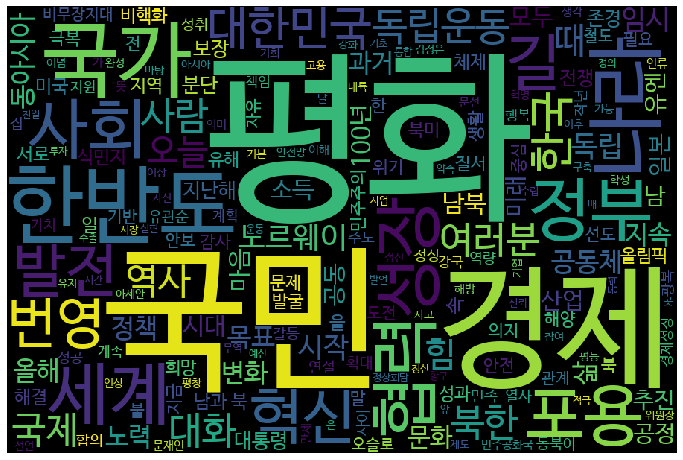

In [29]:
# plt를 이용해 워드클라우드 그리기
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [31]:
# 고양이 모양의 워드 클라우드 만들기
from PIL import Image
import numpy as np

cat = np.array(Image.open("cat.png"))
cat[cat.sum(axis=2) == 0] = 255

In [39]:
cat_cloud = WordCloud(width=900, height=600,
                  font_path="NanumBarunGothic.ttf", 
                  background_color='white',
                  mask=cat)
cat_cloud = cat_cloud.fit_words(noun_counts)

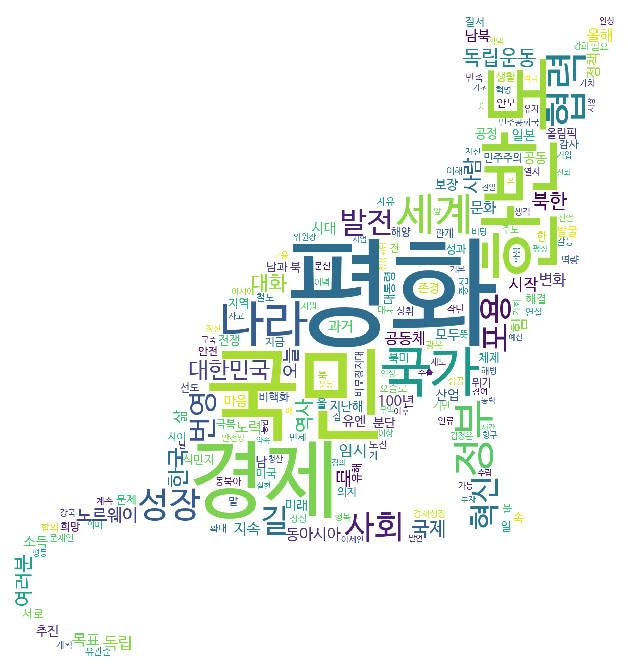

In [40]:
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(cat_cloud)
plt.show()

## 단어 관계도 시각화
### 1. 오늘의 분석 방법 - 한 문장에 동시출현(Co-occurrence)한 두 단어의 빈도를 계산
* 가장 기초적인 단어 관계 분석법
* 실제 현업(?)에서는 머신러닝, 딥러닝을 활용한 분석법을 사용한다고 함
 
### 2. 사용할 라이브러리
* numpy
* networkx (https://networkx.github.io/documentation/stable/reference/introduction.html)

In [5]:
## 관계도 분석하기

# set을 통해 명사 추출 (https://wikidocs.net/1015)

unique_nouns = set()
# 명사 추출하기
for sent in tagged_speech:    
    for word, tag in sent:
        if tag in ['NNP', 'NNG']:
            unique_nouns.add(word)

unique_nouns = list(unique_nouns)

noun_index = {noun: i for i, noun in enumerate(unique_nouns)}
# noun_index
# print(noun_index)

import numpy as np
occurs = np.zeros([len(tweet_list), len(unique_nouns)])

np.shape(occurs)

for i, sent in enumerate(tweet_list):
    for word, tag in sent:
        if tag in ['NNP', 'NNG']:
            index = noun_index[word]  # 명사가 있으면, 그 명사의 인덱스를 index에 저정
            occurs[i][index] += 1  # 문장 i의 index 자리에 1을 채워 넣는다.
        
co_occurs = occurs.T.dot(occurs)
# co_occurs[0]

NameError: name 'tweet_list' is not defined

In [ ]:
import networkx as nx

graph = nx.Graph()

for i in range(len(unique_nouns)):
    for j in range(i + 1, len(unique_nouns)):
        if co_occurs[i][j] > 8500:
            graph.add_edge(unique_nouns[i], unique_nouns[j])
            
# d = dict(graph.degree)
            
# 그래프 그리기
plt.figure(figsize=(10, 10))
layout = nx.spring_layout(graph, k=1 )

# 노드, 엣지 시각화 방식 설정
nx.draw(graph, pos=layout, with_labels=True,
        font_size= 20, font_family="AppleGothic",
        alpha=0.9, node_size= 2000,
       width = [value * 1.2 for value in d.values()],
       edge_color = 'red',
       node_color = 'green')
plt.show()